In [28]:
# Imports
import pandas as pd
import numpy as np

In [29]:
# Define the error calculations

# Good old RMSE
def rmse(control_col,test_col):
    error_col = control_col - test_col
    squared_err_col = error_col ** 2
    mse = np.mean(squared_err_col)
    rmse = np.sqrt(mse)
    return rmse

# Method 1: Normalization by range
# https://en.wikipedia.org/wiki/Root_mean_square_deviation#cite_note-4
# https://cirpwiki.info/wiki/Statistics#Normalization
def rrmse_range_normalization(control_col,test_col):
    error_col = control_col - test_col
    squared_err_col = error_col ** 2
    mse = np.mean(squared_err_col)
    rmse = np.sqrt(mse)
    rrmse = rmse/(np.max(control_col)-np.min(control_col))
    return rrmse

# Method 2: Normalization by mean
# Bad if the mean is 0.
# https://search.r-project.org/CRAN/refmans/ehaGoF/html/gofRRMSE.html
# https://en.wikipedia.org/wiki/Root_mean_square_deviation#cite_note-4
# https://cirpwiki.info/wiki/Statistics#Normalization
def rrmse_mean_normalization(control_col,test_col):
    error_col = control_col - test_col
    squared_err_col = error_col ** 2
    mse = np.mean(squared_err_col)
    rmse = np.sqrt(mse)
    rrmse = rmse/np.mean(control_col)
    return rrmse

# Method 3: Normalization by stdev
# https://stackoverflow.com/a/45160031
def rrmse_stdev_normalization(control_col,test_col):
    error_col = control_col - test_col
    squared_err_col = error_col ** 2
    mse = np.mean(squared_err_col)
    rmse = np.sqrt(mse)
    rrmse = rmse/np.std(control_col) 
    return rrmse

# Method 4: Normalization by mean * n
# https://stackoverflow.com/a/41749834
def rrmse_mean_x_n_normalization(control_col,test_col):
    error_col = control_col - test_col
    squared_err_col = error_col ** 2
    mse = np.mean(squared_err_col)
    rmse = np.sqrt(mse)
    rrmse = rmse/(np.mean(control_col)*len(control_col))
    return rrmse

# Method 5: Normalization by max
# https://stackoverflow.com/a/41749834
def rrmse_max_normalization(control_col,test_col):
    error_col = control_col - test_col
    squared_err_col = error_col ** 2
    mse = np.mean(squared_err_col)
    rmse = np.sqrt(mse)
    rrmse = rmse/np.max(control_col)
    return rrmse

# Method 6: Normalization by interquartile range
# https://www.analyticsvidhya.com/blog/2021/10/evaluation-metric-for-regression-models/#:~:text=Relative%20Root%20Mean%20Square%20Error,to%20compare%20different%20measurement%20techniques
def rrmse_interquartile_normalization(control_col,test_col):
    error_col = control_col - test_col
    squared_err_col = error_col ** 2
    mse = np.mean(squared_err_col)
    rmse = np.sqrt(mse)
    iqr = np.percentile(control_col,75)-np.percentile(control_col,25)
    rrmse = rmse/iqr
    return rrmse

# Method 7: Relative RMSE (Normalization by sum)
# sub-10 is ideal, 30+ is bad.
# https://stats.stackexchange.com/questions/260615/what-is-the-difference-between-rrmse-and-rmsre/
# https://www.analyticsvidhya.com/blog/2021/10/evaluation-metric-for-regression-models/#:~:text=Relative%20Root%20Mean%20Square%20Error,to%20compare%20different%20measurement%20techniques
# Despotovic, M., Nedic, V., Despotovic, D., & Cvetanovic, S., 
# Evaluation of empirical models for predicting monthly mean horizontal diffuse solar radiation, Renewable and Sustainable Energy Reviews, 
# Volume 56, April 2016, Pages 246-260, ISSN 1364-0321, http://dx.doi.org/10.1016/j.rser.2015.11.058.
def rrmse(control_col,test_col):
    error_col = control_col - test_col
    squared_err_col = error_col ** 2
    mse = np.mean(squared_err_col)
    rmse = np.sqrt(mse)
    rrmse = rmse/np.sum(control_col)
    return rrmse

# Method 8: RMSRE (Root Mean Squared Relative Error)
# https://stats.stackexchange.com/questions/260615/what-is-the-difference-between-rrmse-and-rmsre/
def rmsre(control_col,test_col):
    error_col = control_col - test_col
    rel_err_col = error_col/control_col
    squared_err_col = rel_err_col ** 2
    msre = np.mean(squared_err_col)
    rmsre = np.sqrt(msre)
    return rmsre

# Method 9: Normalization by null model
# https://www.youtube.com/watch?v=y1i1TwTvIAI&t=239s
def rrmse_null_model(control_col,test_col):
    error_col = control_col - test_col
    squared_err_col = error_col ** 2
    mse = np.mean(squared_err_col)
    rmse = np.sqrt(mse)
    d = np.mean((control_col-(np.mean(control_col)))**2)
    rrmse = rmse/np.sqrt(d)
    return rrmse

In [30]:
# Construct the dataframe for testing

num_rows = 10
df = pd.DataFrame(np.random.random(size=(num_rows,1))*100,columns=['Control'])
df['Near_Control'] = df['Control'] - np.random.random()*5
df['Null_Model'] = np.mean(df['Control'])
df['Half_Control'] = (df['Control'] + df['Null_Model'])/2
df['Terrible'] = np.random.random(size=(num_rows,1)) * 10
df

,Control,Near_Control,Null_Model,Half_Control,Terrible
0,14.780489,12.235867,40.78513,27.782810,9.704566
1,99.151961,96.607339,40.78513,69.968546,5.540631
2,22.763102,20.218480,40.78513,31.774116,5.147504
3,18.612305,16.067684,40.78513,29.698718,6.653462
4,20.312583,17.767961,40.78513,30.548856,8.081488
5,20.008990,17.464368,40.78513,30.397060,3.863894
6,64.658573,62.113951,40.78513,52.721851,4.544888
7,67.237304,64.692683,40.78513,54.011217,6.035760
8,22.732594,20.187972,40.78513,31.758862,6.720178
9,57.593399,55.048777,40.78513,49.189264,7.106841


In [31]:
results_df = pd.DataFrame(['RMSE',
                           'rrmse_range_normalization',
                           'rrmse_mean_normalization',
                           'rrmse_stdev_normalization',
                           'rrmse_mean_x_n_normalization',
                           'rrmse_max_normalization',
                           'rrmse_interquartile_normalization',
                           'rrmse_sum_normalization (RRMSE)',
                           'RMSRE (Root Mean Squared Relative Error)',
                           'rrmse_null_model'],columns=['Method'])

for col in df.columns:
    results_df[col] = [
        rmse(df['Control'],df[col]),
        rrmse_range_normalization(df['Control'],df[col]),
        rrmse_mean_normalization(df['Control'],df[col]),
        rrmse_stdev_normalization(df['Control'],df[col]),
        rrmse_mean_x_n_normalization(df['Control'],df[col]),
        rrmse_max_normalization(df['Control'],df[col]),
        rrmse_interquartile_normalization(df['Control'],df[col]),
        rrmse(df['Control'],df[col]),
        rmsre(df['Control'],df[col]),
        rrmse_null_model(df['Control'],df[col])
    ]

results_df

,Method,Control,Near_Control,Null_Model,Half_Control,Terrible
0,RMSE,0.0,2.544622,27.619196,13.809598,44.516297
1,rrmse_range_normalization,0.0,0.030160,0.327352,0.163676,0.527623
2,rrmse_mean_normalization,0.0,0.062391,0.677188,0.338594,1.091484
3,rrmse_stdev_normalization,0.0,0.092132,1.000000,0.500000,1.611788
4,rrmse_mean_x_n_normalization,0.0,0.006239,0.067719,0.033859,0.109148
5,rrmse_max_normalization,0.0,0.025664,0.278554,0.139277,0.448970
6,rrmse_interquartile_normalization,0.0,0.059444,0.645197,0.322598,1.039921
7,rrmse_sum_normalization (RRMSE),0.0,0.006239,0.067719,0.033859,0.109148
8,RMSRE (Root Mean Squared Relative Error),0.0,0.105269,0.926761,0.463381,0.774088
9,rrmse_null_model,0.0,0.092132,1.000000,0.500000,1.611788


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
r = results_df.drop(columns='Method')
results_t = r.T
results_t


,0,1,2,3,4,5,6,7,8,9
Control,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Near_Control,2.544622,0.030160,0.062391,0.092132,0.006239,0.025664,0.059444,0.006239,0.105269,0.092132
Null_Model,27.619196,0.327352,0.677188,1.000000,0.067719,0.278554,0.645197,0.067719,0.926761,1.000000
Half_Control,13.809598,0.163676,0.338594,0.500000,0.033859,0.139277,0.322598,0.033859,0.463381,0.500000
Terrible,44.516297,0.527623,1.091484,1.611788,0.109148,0.448970,1.039921,0.109148,0.774088,1.611788


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


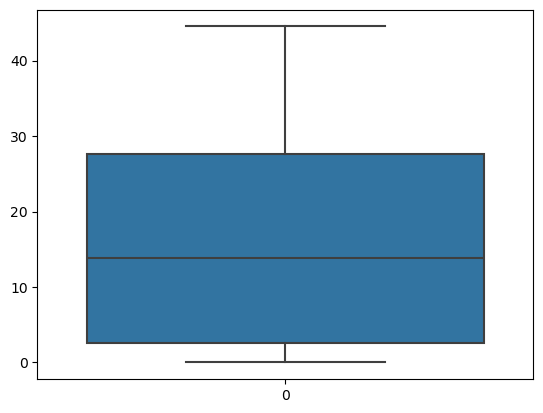

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


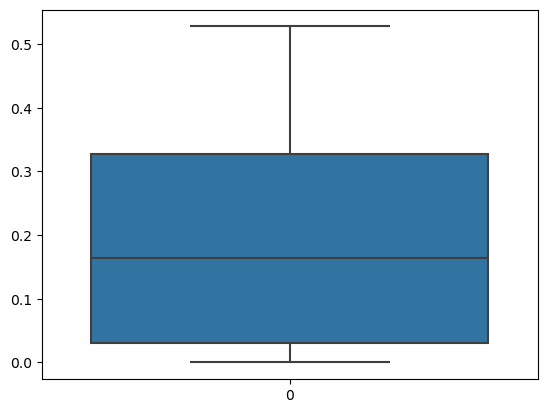

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


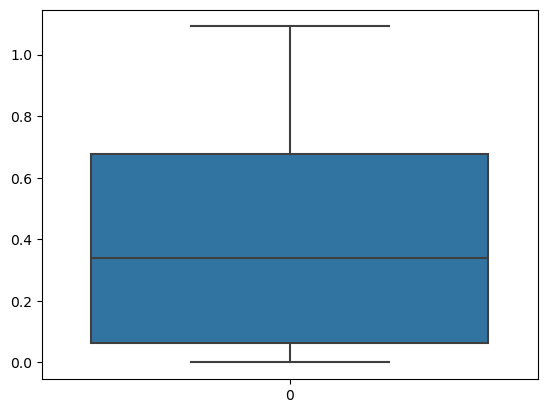

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


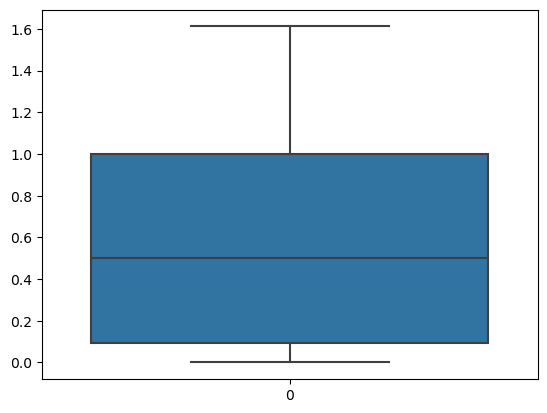

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


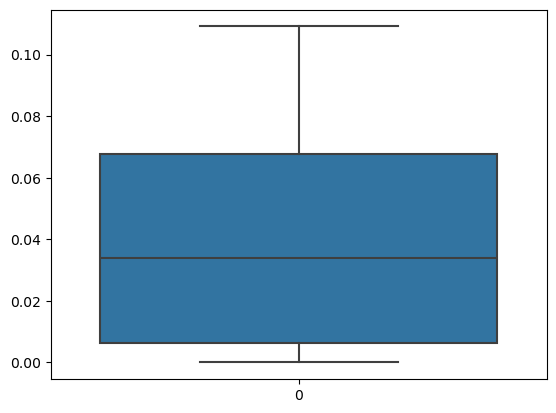

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


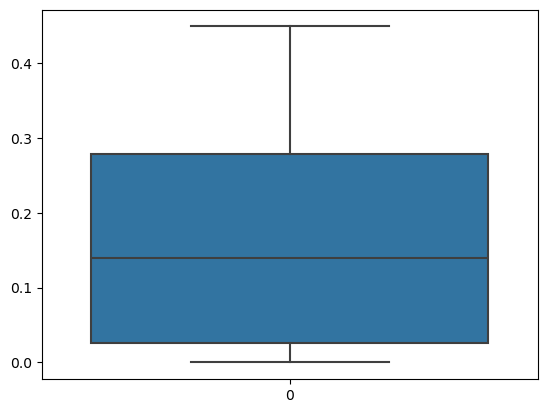

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


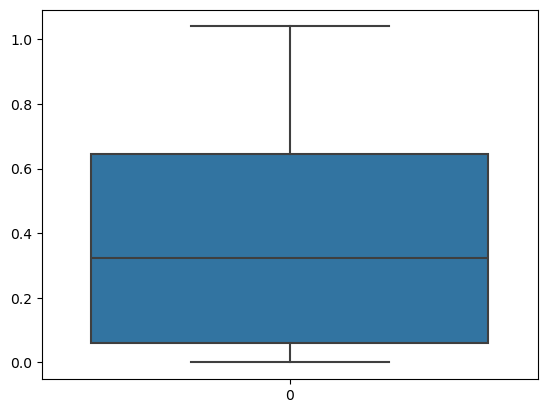

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


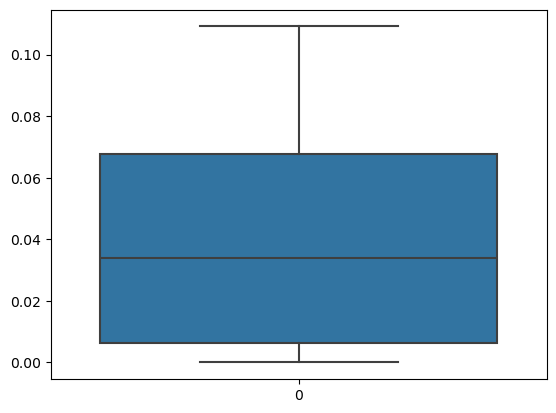

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


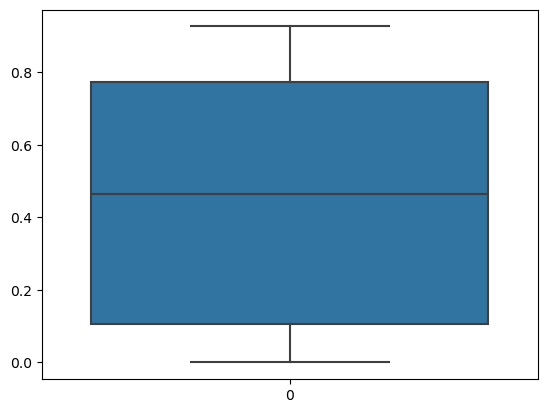

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


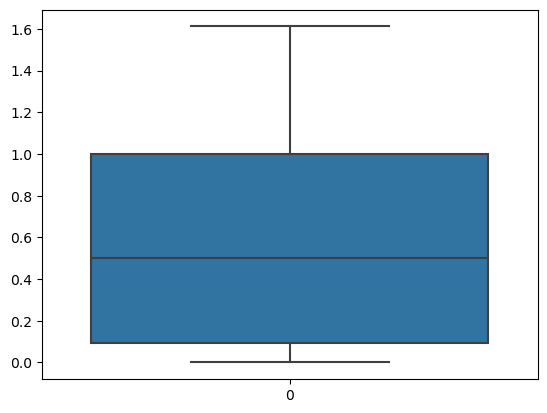

In [33]:
for i in range(10):
    sns.boxplot(data=results_t[i])
    plt.show()